## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
from sklearn.cluster import KMeans

## Load the data

In [2]:
data = pd.read_csv("3.12.+Example.csv")

In [3]:
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


## Plot the data

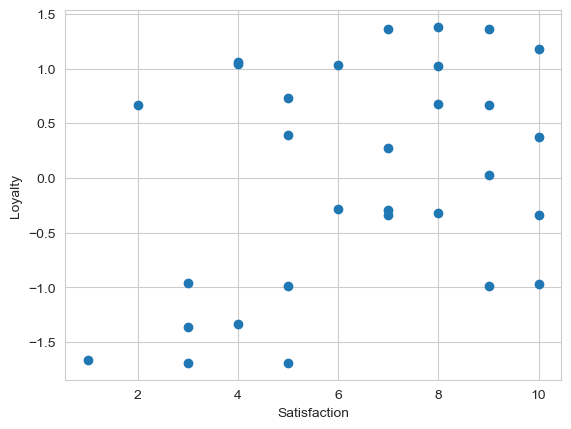

In [4]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

## Select the features

In [5]:
x = data.copy()

## Clustering

In [6]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

## Clustering results

In [7]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

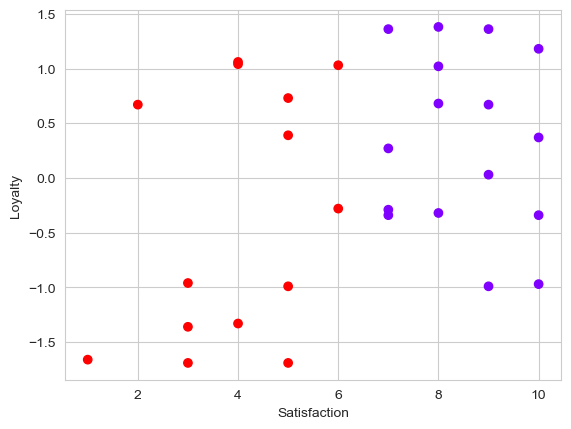

In [8]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=clusters['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Standardize the variables

In [19]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Take advantage of the Elbow method

In [10]:
wcss=[]

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.24718180592842,
 7.792695153937187,
 6.549836791599329,
 5.398758288946923,
 4.33711075023706,
 3.7504443965485503]

Text(0, 0.5, 'WCSS')

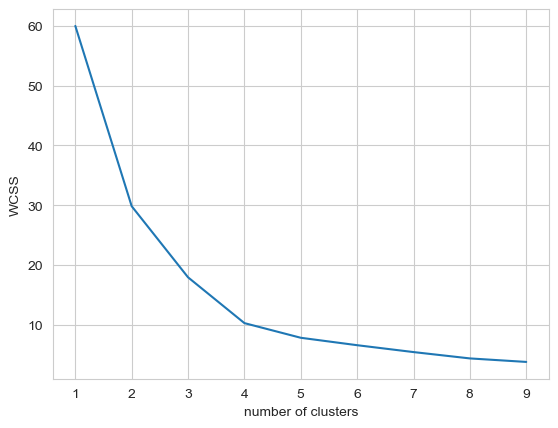

In [11]:
plt.plot(range(1,10), wcss)
plt.xlabel('number of clusters')
plt.ylabel('WCSS')

## Explore clustering solutions and select the number of clusters

In [12]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [13]:
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,2
2,5,-0.99,1
3,7,-0.29,2
4,4,1.06,3
5,1,-1.66,1
6,10,-0.97,2
7,8,-0.32,2
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalty')

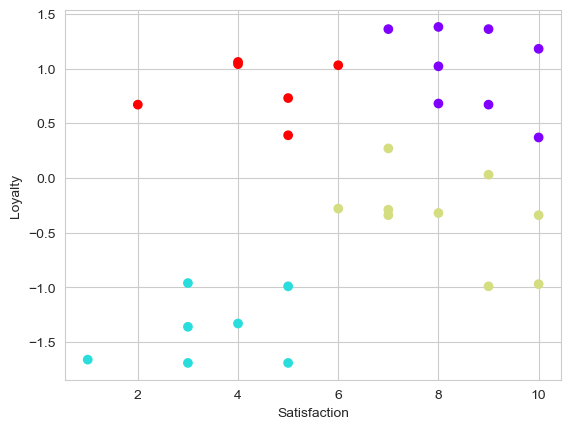

In [14]:
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c=clusters_new['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

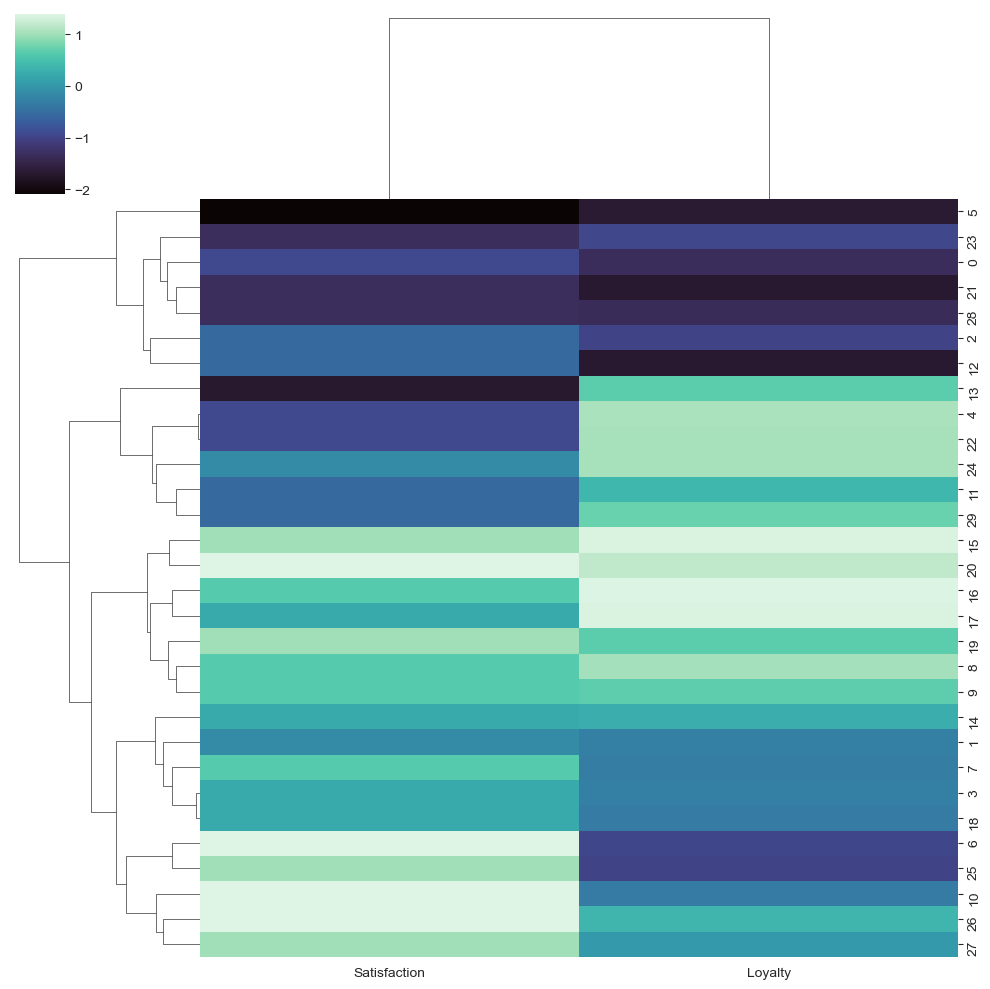

In [22]:
x_scaled_df = pd.DataFrame(data=x_scaled, columns=['Satisfaction', 'Loyalty'])
sns.clustermap(x_scaled_df, cmap='mako')